# Analysis of Long Term Weather Trends

Author: Irene Kilgannon

Student ID: G00220627

This notebook analyses long term weather data focussing on wind trends. 

The data is from [full_weather.csv](data/weather/merged_data/full_weather.csv), which was created by merging separate weather CSV files, obtained from [Met Éireann](https://www.met.ie/climate/available-data/historical-data) in [clean_weather.ipynb](clean_weather_data.ipynb). 

The results of this analysis will be discussed as part of the wind energy analysis Jupyter notebook, [wind_energy_analysis.ipynb](wind_energy_analysis.ipynb).

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.graphics import tsaplots

In [2]:
# Set style
plt.style.use('seaborn-v0_8')

In [3]:
# Load full_weather
full_weather = pd.read_csv('data/weather/merged_data/full_weather.csv', index_col= 'date' , parse_dates= ['date'])
full_weather.head()

,rain,temp,rhum,msl,wdsp,wddir,rain.1,temp.1,rhum.1,msl.1,...,rhum.10,msl.10,wdsp.10,wddir.10,rain.11,temp.11,rhum.11,msl.11,wdsp.11,wddir.11
date,,,,,,,,,,,,,,,,,,,,,
1945-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,1037.2,3.0,350.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,1037.2,2.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,1037.3,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,1037.5,9.0,350.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.0,1037.6,9.0,350.0,NaN,NaN,NaN,NaN,NaN,NaN


To transform the data set all the column names for e.g. temp must be the same. The suffixes were removed from the column names with the str.replace() method.  

In [4]:
# Remove suffixes from the column names
full_weather.columns = full_weather.columns.str.replace(r'\.\d+', '', regex= True)

In [5]:
# Transform data set
full_weather = full_weather.T.groupby(full_weather.columns).mean().T.round(2)
full_weather.head()

,msl,rain,rhum,temp,wddir,wdsp
date,,,,,,
1945-01-01 00:00:00,1036.50,0.0,97.0,6.90,175.0,1.5
1945-01-01 01:00:00,1036.50,0.0,97.0,6.80,180.0,1.0
1945-01-01 02:00:00,1036.55,0.0,95.0,6.95,5.0,3.0
1945-01-01 03:00:00,1036.80,0.1,95.0,7.05,175.0,4.5
1945-01-01 04:00:00,1036.90,0.0,94.5,7.45,300.0,8.0


In [6]:
# Rename columns
full_weather.rename({'msl': 'Pressure (hPa)', 
                    'rain': 'Rain (mm)', 
                    'temp': 'Temp (°C)', 
                    'wddir': 'Wind Direction (deg)', 
                    'wdsp': 'Wind Speed (knots)', 
                    'rhum': 'Relative Humidity (%)'}, 
                    axis = 'columns',
                    inplace= True)

In [7]:
# Remove data for 1st Jan 2025
full_weather.drop('2025-01-01', inplace= True)

In [8]:
# Resample by yearly averages.
yearly_weather = full_weather.resample('YE').mean()
yearly_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
date,,,,,,
1945-12-31,1015.041228,0.113063,84.067919,10.732281,191.862624,10.698941
1946-12-31,1013.754418,0.131450,82.557236,9.881180,194.344760,11.251252
1947-12-31,1012.983849,0.131039,83.498215,9.755525,179.146513,10.920345
1948-12-31,1013.702330,0.127533,83.192139,10.423476,197.734906,11.176925
1949-12-31,1016.468785,0.107627,82.679561,11.004886,201.536969,10.729878


In [9]:
# Resample monthly
monthly_weather = full_weather.resample('ME').mean()
monthly_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
date,,,,,,
1945-01-31,1017.445296,0.097917,83.384409,3.424194,193.783602,12.520161
1945-02-28,1015.876265,0.164732,84.894345,8.402604,215.632440,14.389137
1945-03-31,1024.762164,0.057527,81.050403,8.950538,196.008065,11.227151
1945-04-30,1017.113542,0.056528,79.850694,9.780486,183.027778,11.183333
1945-05-31,1008.991868,0.121371,80.937500,11.181116,183.911290,10.190860


In [10]:
def assign_season(month):
    ''' Add a column with the meteorological season based on the given month

    Arguments:
        month (int): The month of the year.
        
    Returns:
        The season is added to the DataFrame
        '''
    
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

In [11]:
full_weather['Season'] = full_weather.index.month.map(assign_season)
full_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Season
date,,,,,,,
1945-01-01 00:00:00,1036.50,0.0,97.0,6.90,175.0,1.5,Winter
1945-01-01 01:00:00,1036.50,0.0,97.0,6.80,180.0,1.0,Winter
1945-01-01 02:00:00,1036.55,0.0,95.0,6.95,5.0,3.0,Winter
1945-01-01 03:00:00,1036.80,0.1,95.0,7.05,175.0,4.5,Winter
1945-01-01 04:00:00,1036.90,0.0,94.5,7.45,300.0,8.0,Winter


In [12]:
# Add season column to monthly_weather 
monthly_weather['Season'] = monthly_weather.index.month.map(assign_season)
monthly_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Season
date,,,,,,,
1945-01-31,1017.445296,0.097917,83.384409,3.424194,193.783602,12.520161,Winter
1945-02-28,1015.876265,0.164732,84.894345,8.402604,215.632440,14.389137,Winter
1945-03-31,1024.762164,0.057527,81.050403,8.950538,196.008065,11.227151,Spring
1945-04-30,1017.113542,0.056528,79.850694,9.780486,183.027778,11.183333,Spring
1945-05-31,1008.991868,0.121371,80.937500,11.181116,183.911290,10.190860,Spring


## Exploratory Data Analysis

In [13]:
# Check the dataframe
full_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Season
date,,,,,,,
1945-01-01 00:00:00,1036.50,0.0,97.0,6.90,175.0,1.5,Winter
1945-01-01 01:00:00,1036.50,0.0,97.0,6.80,180.0,1.0,Winter
1945-01-01 02:00:00,1036.55,0.0,95.0,6.95,5.0,3.0,Winter
1945-01-01 03:00:00,1036.80,0.1,95.0,7.05,175.0,4.5,Winter
1945-01-01 04:00:00,1036.90,0.0,94.5,7.45,300.0,8.0,Winter


In [ ]:
# Summary statistics of numeric variables
full_weather.describe()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
count,701280.000000,701280.000000,701280.000000,701280.000000,701280.000000,701280.000000
mean,1013.583086,0.126144,83.434662,10.042879,200.386474,10.088543
std,12.354788,0.286208,9.236937,4.428865,69.626999,4.938527
min,944.030000,0.000000,36.170000,-8.890000,0.000000,0.000000
25%,1006.130000,0.000000,78.170000,6.930000,151.670000,6.330000
50%,1014.870000,0.000000,85.330000,10.120000,207.500000,9.330000
75%,1022.270000,0.120000,90.500000,13.310000,253.330000,13.000000
max,1049.220000,8.330000,181.830000,27.440000,360.000000,44.330000


In [ ]:
# Information on the dataset
full_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701280 entries, 1945-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Pressure (hPa)         701280 non-null  float64
 1   Rain (mm)              701280 non-null  float64
 2   Relative Humidity (%)  701280 non-null  float64
 3   Temp (°C)              701280 non-null  float64
 4   Wind Direction (deg)   701280 non-null  float64
 5   Wind Speed (knots)     701280 non-null  float64
 6   Season                 701280 non-null  object 
dtypes: float64(6), object(1)
memory usage: 42.8+ MB


The data set has over 700,000 rows with 6 columns. The pressure (hPa), rain (mm), relative humidity (%), temperature (°C), wind direction (degrees) and wind speed (knots) were recorded hourly from the 1st January 1945 to the 31st December 2024.

### Line Plots

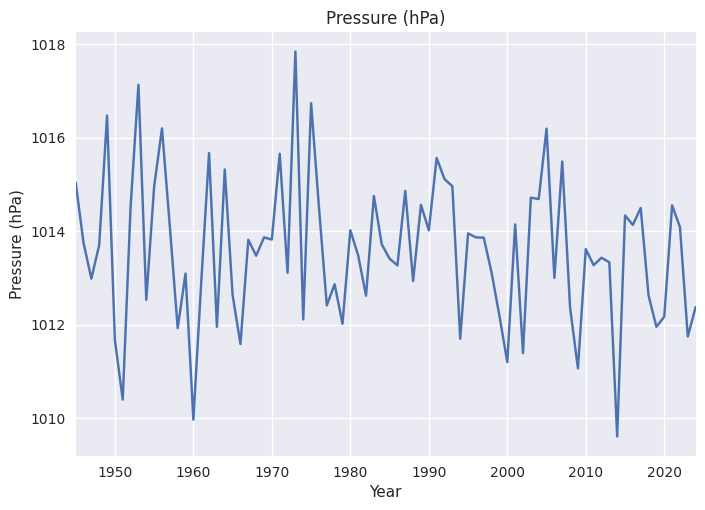

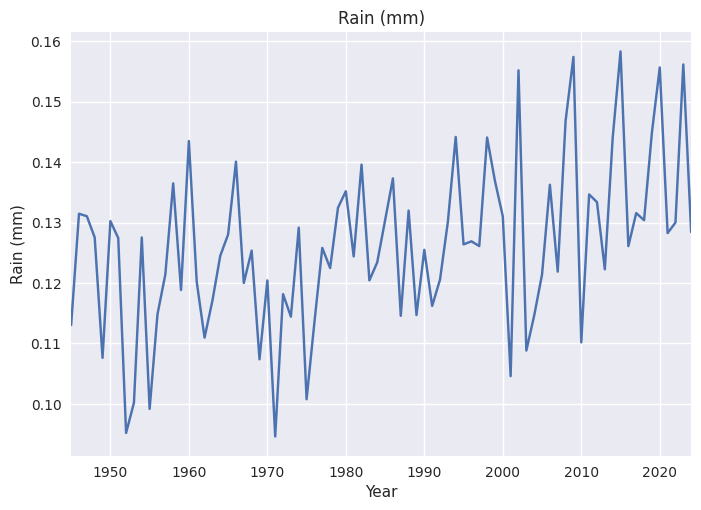

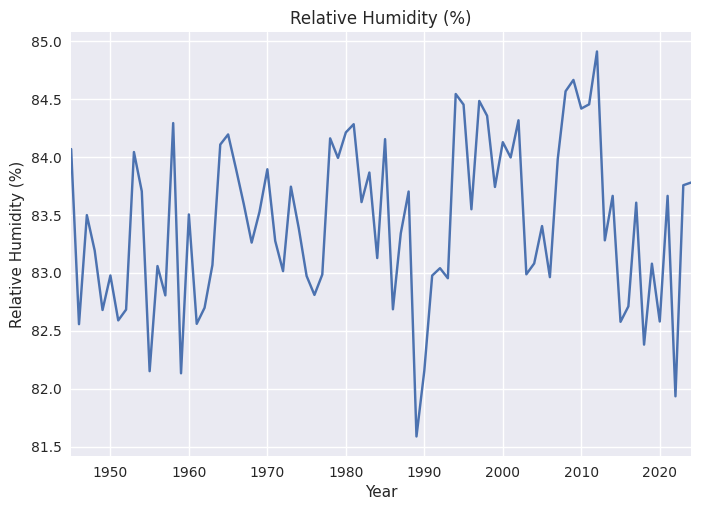

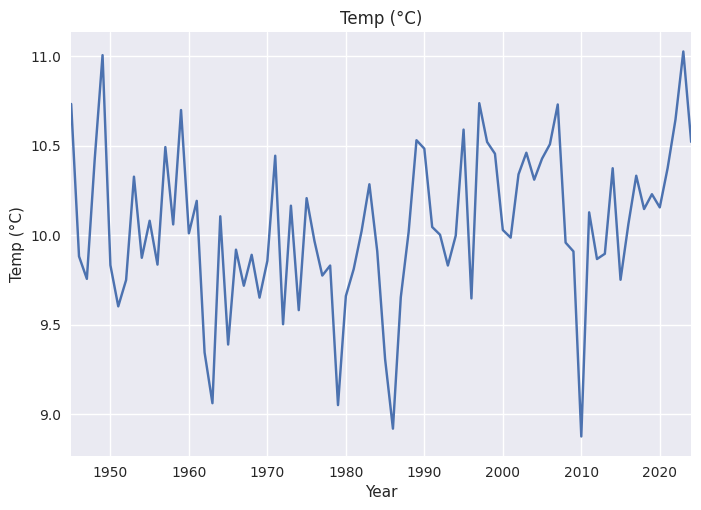

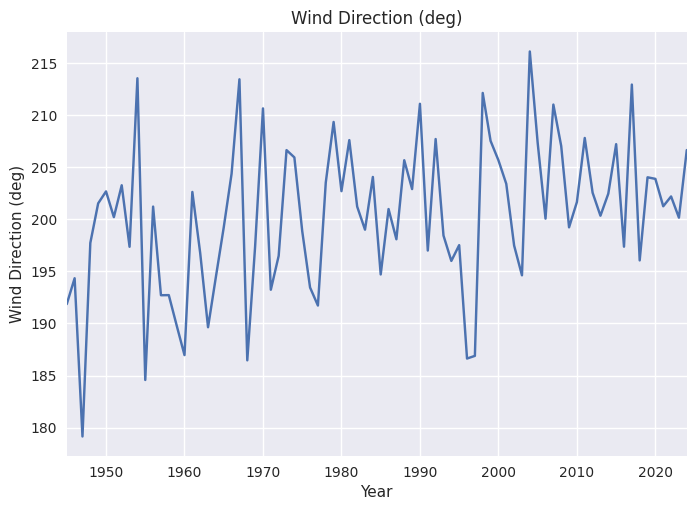

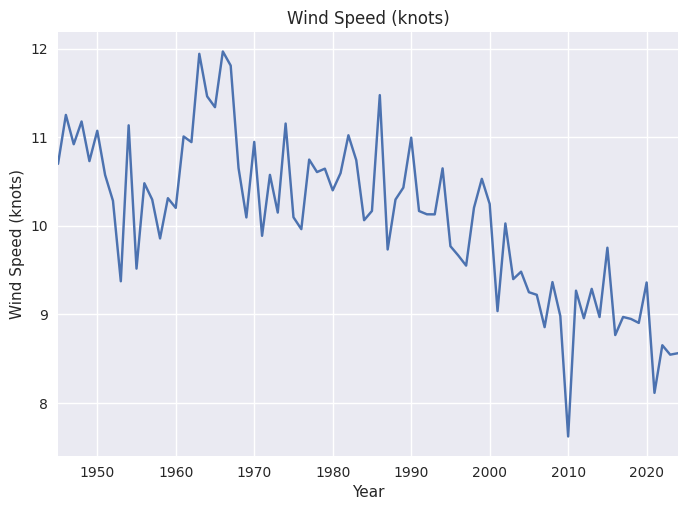

In [16]:
# Line plot of the numeric datatypes.
for col in yearly_weather:
    if yearly_weather[col].dtypes == 'float':
        fig, ax = plt.subplots()

        yearly_weather[col].plot(subplots= True)

        plt.title(f'{col}')
        plt.xlabel('Year')
        plt.ylabel(col)
        plt.savefig(f'plots/{col}.png')
        plt.show()

### Histograms

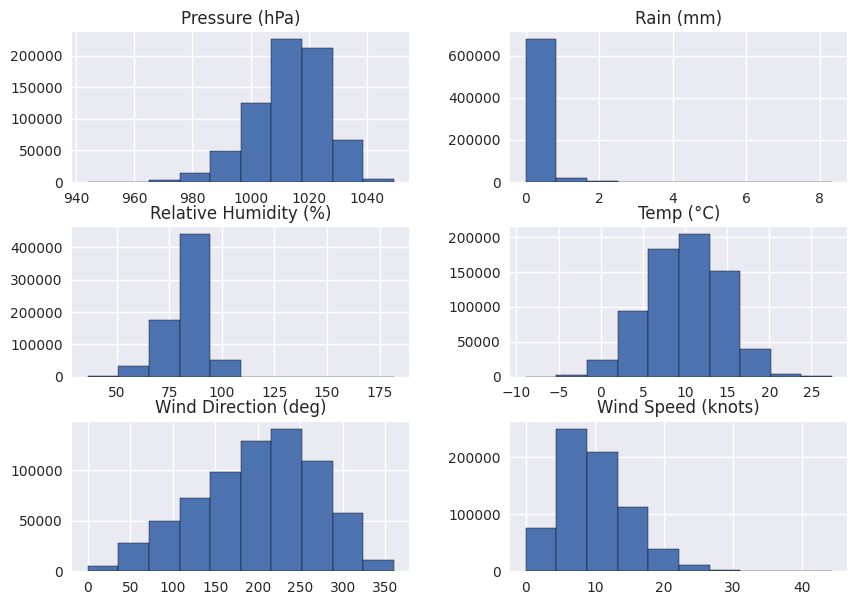

In [ ]:
# Plot the distributions
full_weather.hist(figsize= (10, 7), edgecolor = 'black')
plt.show()

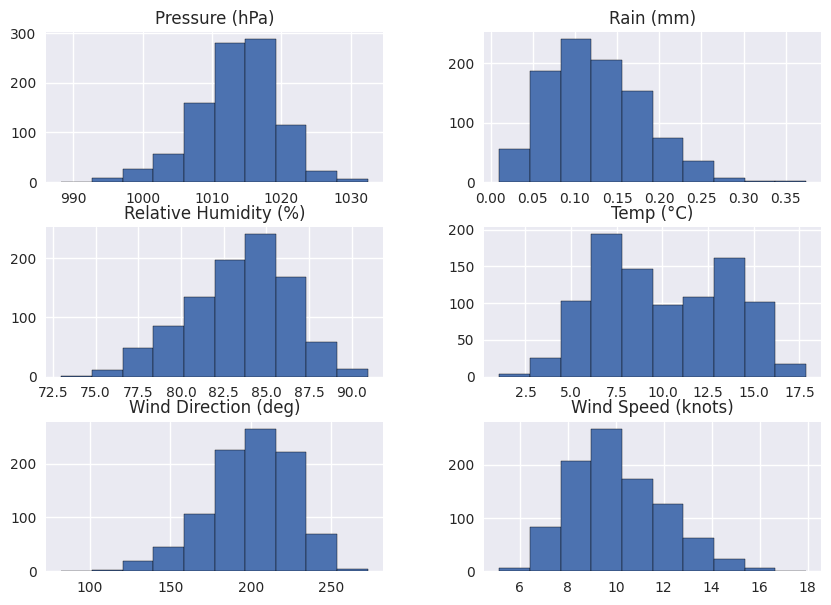

In [18]:
# Distribution in monthly_weather
monthly_weather.hist(figsize= (10, 7), edgecolor = 'black')
plt.show()

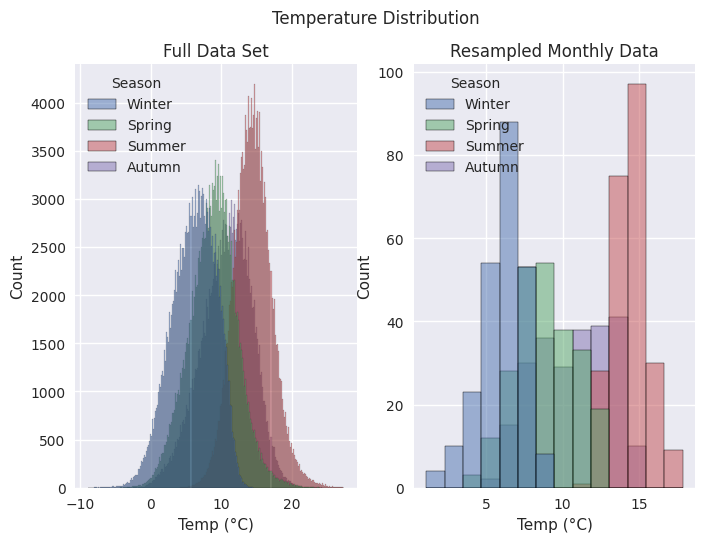

In [ ]:
# Compare the temperature distributions of the full dataset and the monthly mean resample dataset.
fig, ax = plt.subplots(1, 2)

# Distribution in full dataset
sns.histplot(data = full_weather, x = 'Temp (°C)', hue = 'Season', ax = ax[0] )
ax[0].set_title('Full Data Set')

# Distribution in the monthly resampled dataset
sns.histplot(data = monthly_weather, x = 'Temp (°C)', hue= 'Season', ax = ax[1])
ax[1].set_title('Resampled Monthly Data')

plt.suptitle('Temperature Distribution')
plt.show()

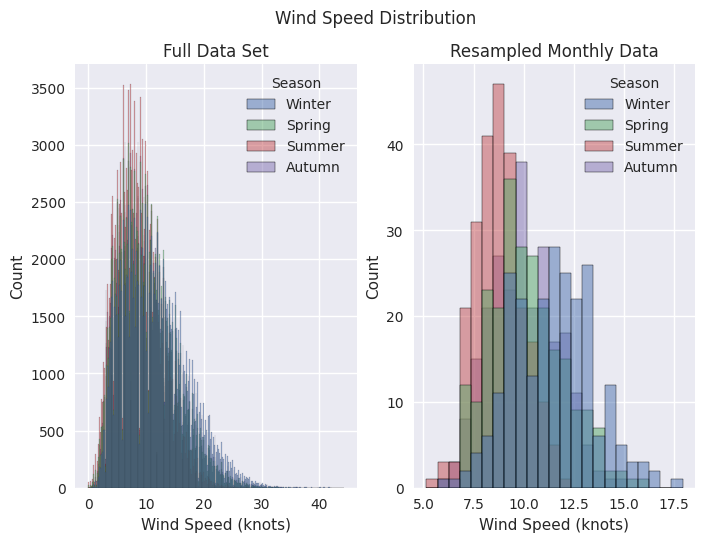

In [ ]:
# Compare the wind speed distributions of the full dataset and the monthly mean resample dataset.
fig, ax = plt.subplots(1, 2)

# Distribution in full dataset
sns.histplot(data = full_weather, x = 'Wind Speed (knots)', hue = 'Season', ax = ax[0] )
ax[0].set_title('Full Data Set')

# Distribution in the monthly resampled dataset
sns.histplot(data = monthly_weather, x = 'Wind Speed (knots)', hue= 'Season', ax = ax[1])
ax[1].set_title('Resampled Monthly Data')

plt.suptitle('Wind Speed Distribution')
plt.show()

### Scatter Plots

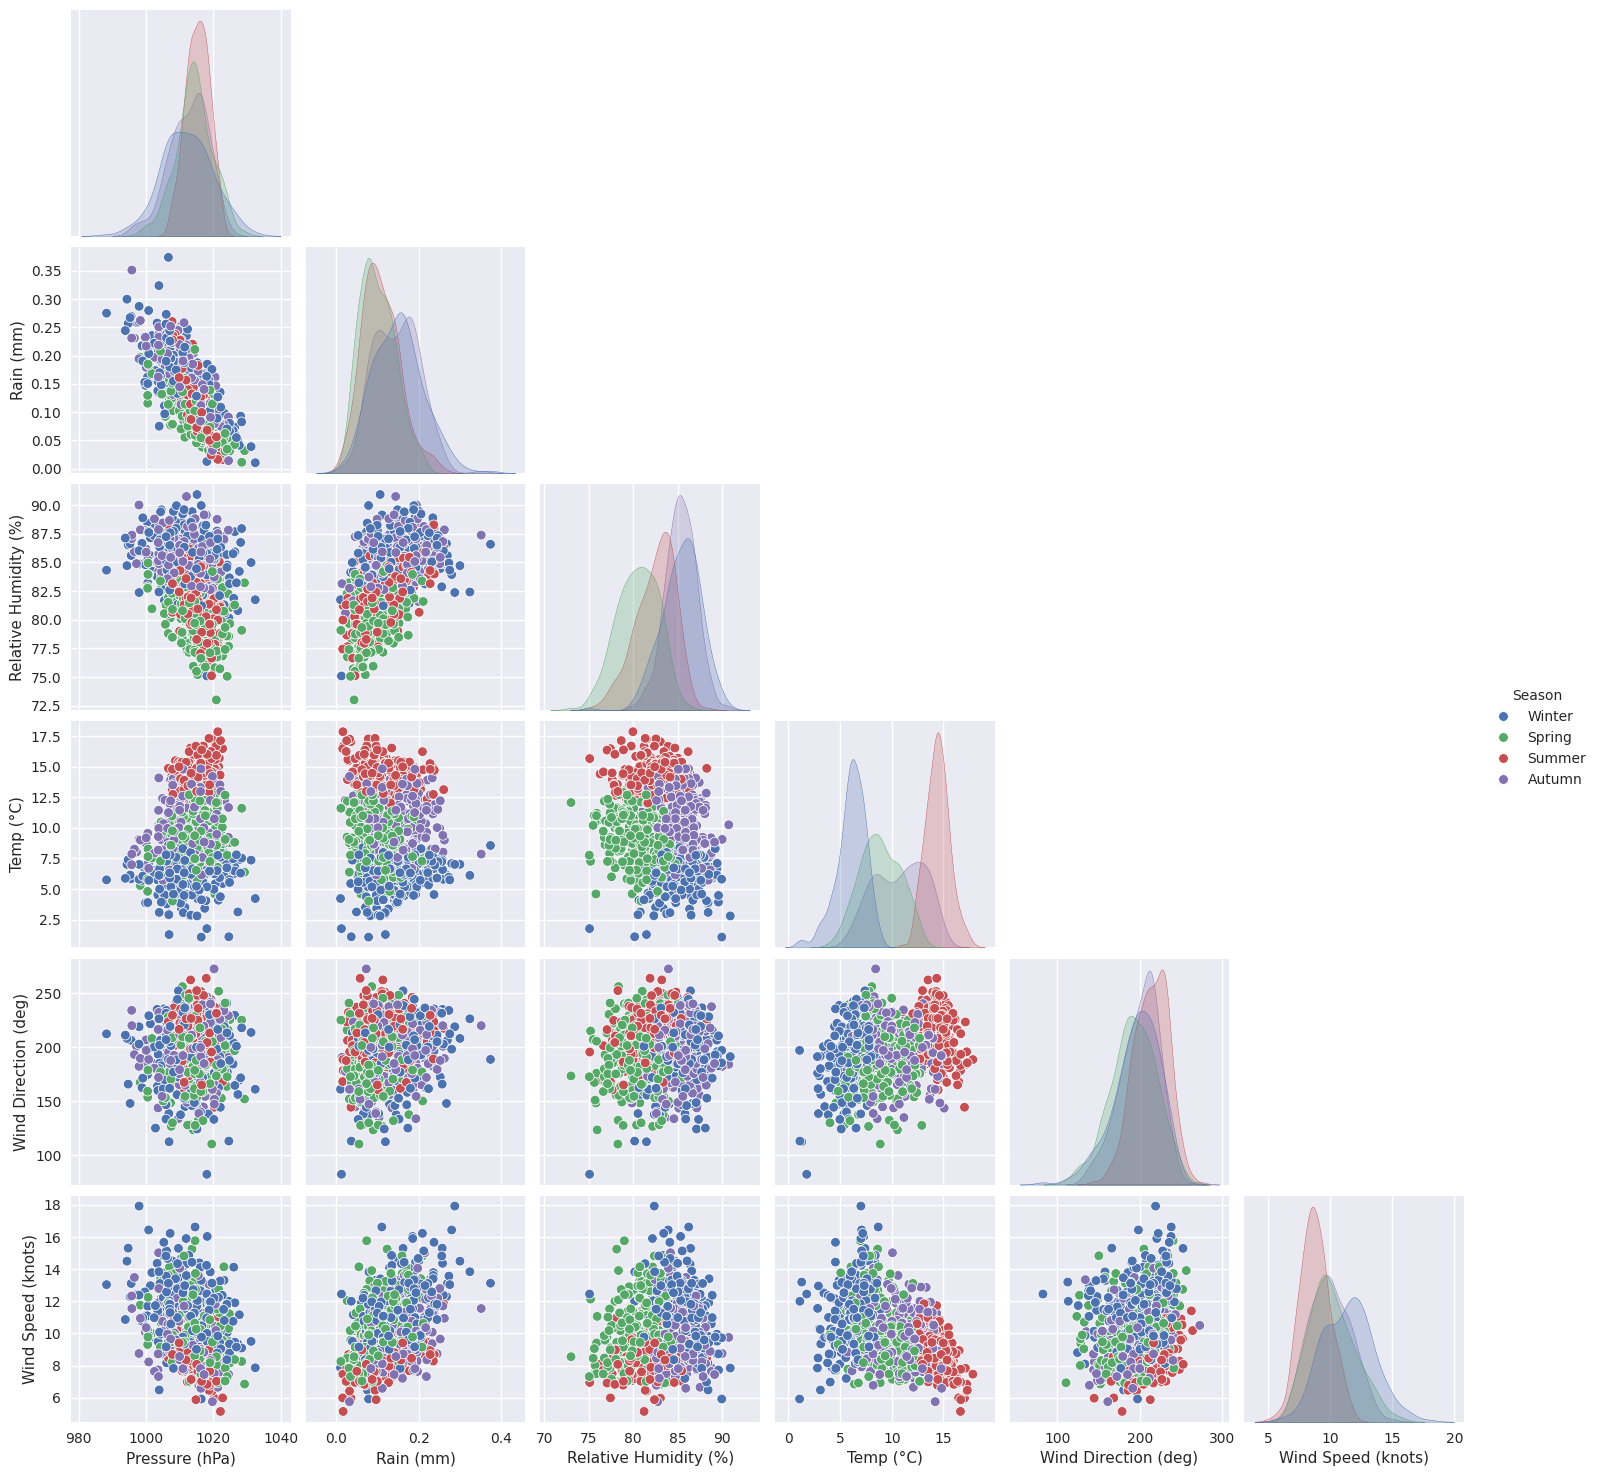

In [ ]:
# Scatter pair plot of monthly resampled data
sns.pairplot(data= monthly_weather, hue = 'Season', corner= True)
plt.show()

In [22]:
# Correlation Analysis
full_weather.corr(numeric_only= True).round(3)

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
Pressure (hPa),1.000,-0.358,-0.132,0.086,-0.048,-0.398
Rain (mm),-0.358,1.000,0.237,0.011,-0.047,0.267
Relative Humidity (%),-0.132,0.237,1.000,-0.192,-0.091,-0.210
Temp (°C),0.086,0.011,-0.192,1.000,0.069,0.033
Wind Direction (deg),-0.048,-0.047,-0.091,0.069,1.000,0.191
Wind Speed (knots),-0.398,0.267,-0.210,0.033,0.191,1.000


## Exploring Wind Trends

### What's the windiest month?

In [ ]:
# Calculate monthly mean and max wind speed data.
windspeed_by_month = full_weather.groupby(full_weather.index.month)['Wind Speed (knots)'].agg(['max', 'mean'])
print(windspeed_by_month)

        max       mean
date                  
1     43.50  11.533168
2     41.50  11.468020
3     35.33  10.982520
4     40.33   9.971416
5     31.50   9.541666
6     31.75   8.984722
7     28.67   8.670804
8     32.25   8.635403
9     37.75   9.407126
10    36.00  10.132523
11    38.25  10.457651
12    44.33  11.350405


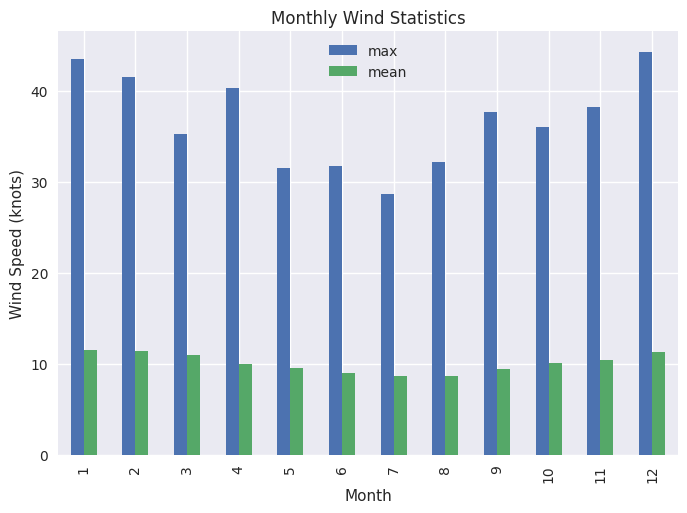

In [24]:
# Plot of Monthly Wind Speeds
fig, ax = plt.subplots()

windspeed_by_month.plot(kind = 'bar', ax = ax)

plt.xlabel('Month')
plt.ylabel('Wind Speed (knots)')
plt.title('Monthly Wind Statistics')
plt.savefig('plots/monthly_wind_statistics.png')

plt.show()

### What is the Trend in Wind Speeds?

In [25]:
yearly_weather['rolling_wind_speed_3'] = yearly_weather['Wind Speed (knots)'].rolling(3).mean()

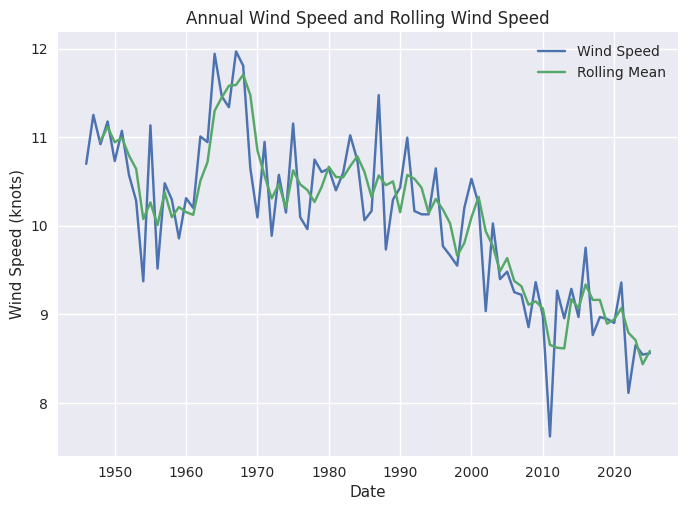

In [26]:
# Plot of the Annual Mean Wind Speed and its Rolling Mean
fig, ax = plt.subplots()

plt.plot(yearly_weather['Wind Speed (knots)'], label = 'Wind Speed')
plt.plot(yearly_weather['rolling_wind_speed_3'], label = 'Rolling Mean')

plt.legend()

plt.title('Annual Wind Speed and Rolling Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (knots)')
plt.savefig('plots/Wind_speed_rolling.png')
plt.show()

In [27]:
# Calculate rolling mean
monthly_weather['rolling_wind_speed_12'] = monthly_weather['Wind Speed (knots)'].rolling(12).mean()

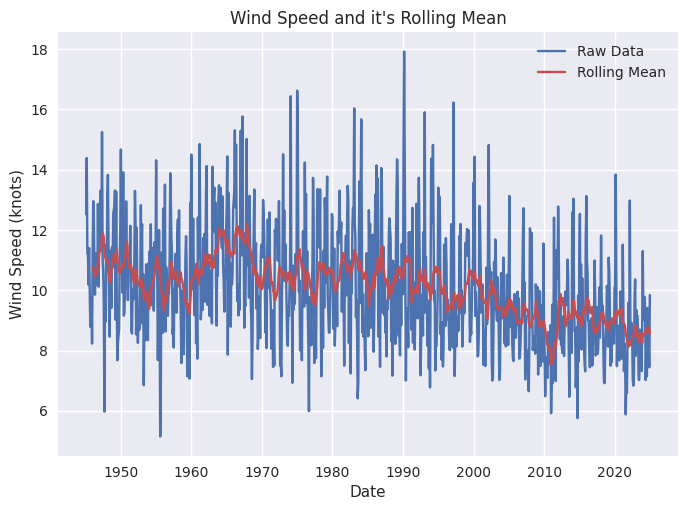

In [28]:
# Calculate monthly mean wind speed and its rolling mean
fig, ax = plt.subplots()

plt.plot(monthly_weather['Wind Speed (knots)'], label = 'Raw Data')
plt.plot(monthly_weather['rolling_wind_speed_12'], label = 'Rolling Mean', color = '#C44E52')

plt.title("Wind Speed and it's Rolling Mean")
plt.xlabel('Date')
plt.ylabel('Wind Speed (knots)')

plt.legend()
plt.show()

### How as the Wind Speed Changed Since 1945?

In [29]:
# Calculate the annual mean wind speeds
annual_mean_wind_speed = full_weather.groupby(full_weather.index.year)['Wind Speed (knots)'].mean()
round(annual_mean_wind_speed, 2)

date
1945    10.70
1946    11.25
1947    10.92
1948    11.18
1949    10.73
        ...  
2020     9.36
2021     8.11
2022     8.65
2023     8.54
2024     8.56
Name: Wind Speed (knots), Length: 80, dtype: float64

### What is the Seasonal Variation in Wind Speed? What is the Windiest Season?

In [30]:
# Mean wind speed for each season
windy_seasons = monthly_weather.groupby('Season')['Wind Speed (knots)'].mean()
windy_seasons

Season
Autumn     9.999100
Spring    10.165201
Summer     8.763643
Winter    11.451788
Name: Wind Speed (knots), dtype: float64

In [31]:
# Calculate mean wind speeds, grouped by year and season
yearly_windy_seasons = monthly_weather.groupby([monthly_weather.index.year, 'Season'])['Wind Speed (knots)'].mean().reset_index()
yearly_windy_seasons.head()

,date,Season,Wind Speed (knots)
0,1945,Autumn,9.212929
1,1945,Spring,10.867115
2,1945,Summer,10.072454
3,1945,Winter,12.738686
4,1946,Autumn,11.585850


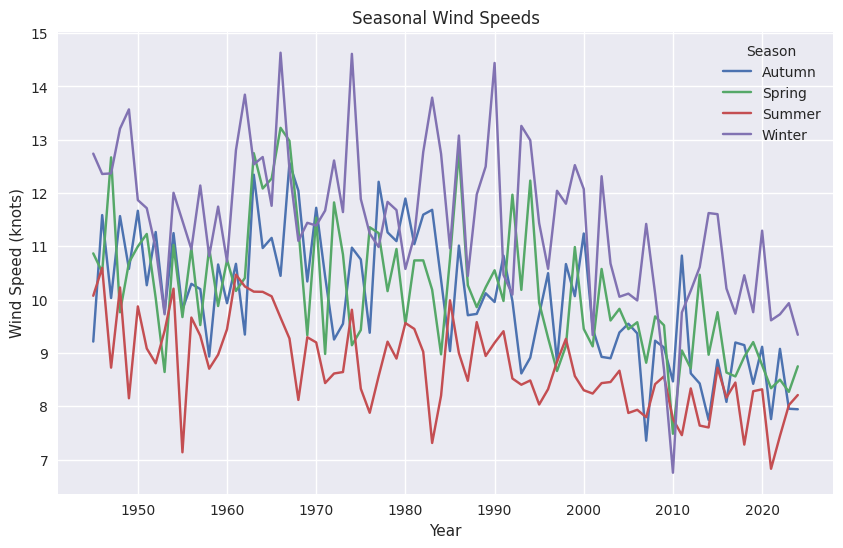

In [ ]:
# Plot the wind speeds for each season
plt.figure(figsize=(10, 6))

sns.lineplot(data= yearly_windy_seasons, x = 'date', y = 'Wind Speed (knots)', hue= 'Season')

plt.title('Seasonal Wind Speeds')
plt.xlabel('Year')
plt.savefig('plots/seasonal_wind_speeds.png')
plt.show()

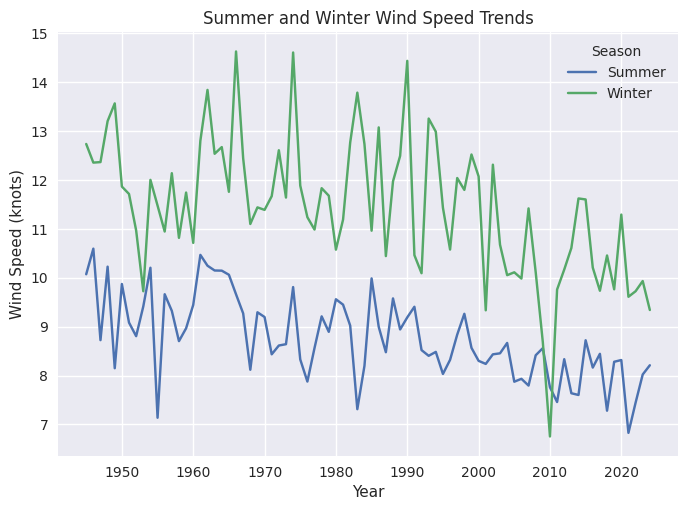

In [33]:
# Select summer and winter
windy_seasons_filtered = yearly_windy_seasons[yearly_windy_seasons["Season"].isin(["Summer", "Winter"])]

# Plot only summer and winter
plt.figure()

sns.lineplot(data = windy_seasons_filtered, x = 'date', y= 'Wind Speed (knots)', hue= 'Season')

plt.title('Summer and Winter Wind Speed Trends')
plt.xlabel('Year')
plt.savefig('plots/summer_winter_wind_speeds.png')
plt.show()

### Has the Wind Direction Changed? 

In [34]:
# Calculate rolling mean of wind direction
wind_direction = full_weather['wind_direction_rolling'] = full_weather['Wind Direction (deg)'].rolling(24).mean()
wind_direction

date
1945-01-01 00:00:00           NaN
1945-01-01 01:00:00           NaN
1945-01-01 02:00:00           NaN
1945-01-01 03:00:00           NaN
1945-01-01 04:00:00           NaN
                          ...    
2024-12-31 19:00:00    216.459583
2024-12-31 20:00:00    218.022083
2024-12-31 21:00:00    219.410833
2024-12-31 22:00:00    221.112083
2024-12-31 23:00:00    222.744167
Name: Wind Direction (deg), Length: 701280, dtype: float64

In [35]:
wind_dir_year = full_weather.groupby(full_weather.index.year)['Wind Direction (deg)'].mean()
wind_dir_year

date
1945    191.862624
1946    194.344760
1947    179.146513
1948    197.734906
1949    201.536969
           ...    
2020    203.890055
2021    201.257586
2022    202.201508
2023    200.164377
2024    206.657302
Name: Wind Direction (deg), Length: 80, dtype: float64

In [36]:
wind_dir_year.loc['2015':]

date
2015    207.224121
2016    197.376228
2017    212.947984
2018    196.058337
2019    204.040811
2020    203.890055
2021    201.257586
2022    202.201508
2023    200.164377
2024    206.657302
Name: Wind Direction (deg), dtype: float64

In [37]:
wind_dir_year.loc[:'1954']

date
1945    191.862624
1946    194.344760
1947    179.146513
1948    197.734906
1949    201.536969
1950    202.685691
1951    200.212385
1952    203.275295
1953    197.366446
1954    213.553342
Name: Wind Direction (deg), dtype: float64

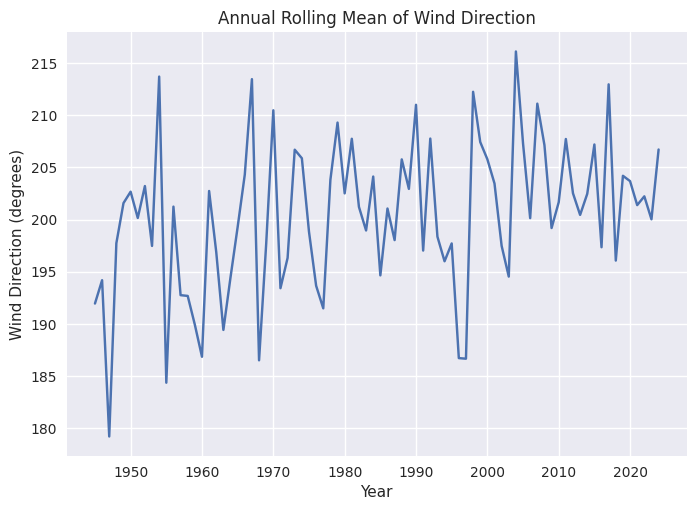

In [38]:
# Plot Annual Rolling Mean of Wind Direction
fig, ax = plt.subplots()

full_weather.groupby(full_weather.index.year)['wind_direction_rolling'].mean().plot()

plt.title('Annual Rolling Mean of Wind Direction')
plt.xlabel('Year')
plt.ylabel('Wind Direction (degrees)')
plt.show()

## Seasonal Trend Analysis with Statsmodels

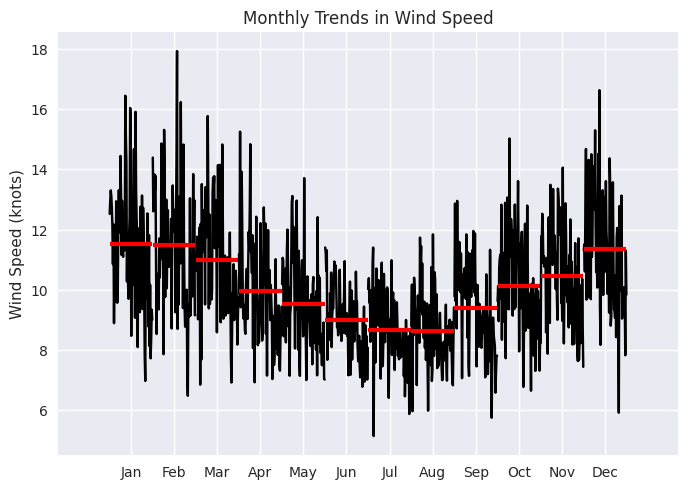

In [39]:
# Seasonal Monthly Trends in Wind Speed
month_plot(monthly_weather['Wind Speed (knots)'], ylabel= 'Wind Speed (knots)')

plt.title('Monthly Trends in Wind Speed')
plt.savefig('plots/long_term_month_plot_wind.png')
plt.show()

In [40]:
fifties_weather = monthly_weather.loc['1950' : '1959']

recent_decade = monthly_weather.loc['2014' : '2024' ]

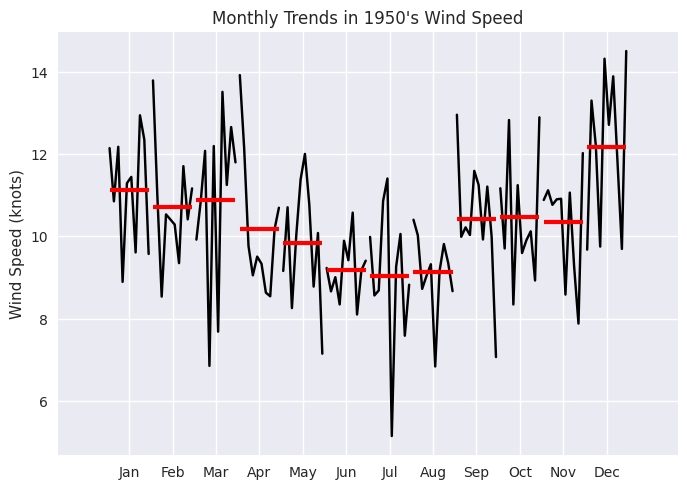

In [41]:
month_plot(fifties_weather['Wind Speed (knots)'], ylabel= 'Wind Speed (knots)')

plt.title("Monthly Trends in 1950's Wind Speed")
plt.savefig('plots/fifties_wind.png')
plt.show()

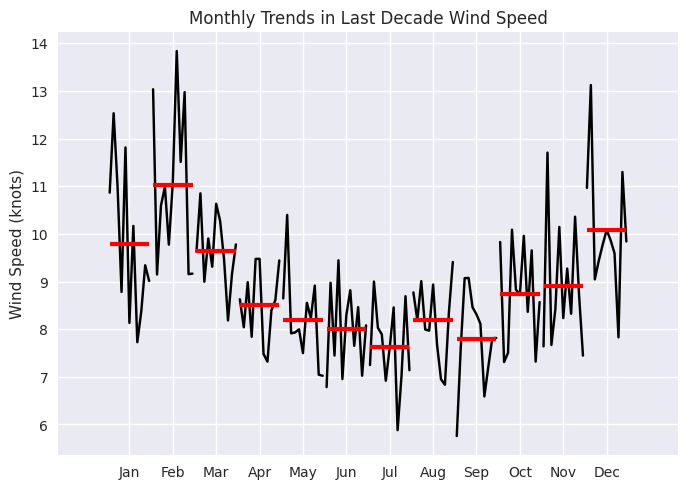

In [ ]:
# Monthly trends in wind speeds for 2014-2024
month_plot(recent_decade['Wind Speed (knots)'], ylabel= 'Wind Speed (knots)')

plt.title("Monthly Trends in Last Decade Wind Speed")
plt.show()

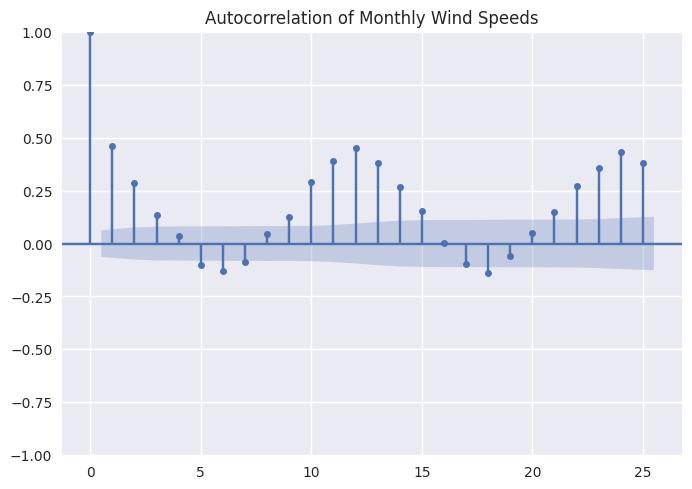

In [43]:
# Autocorrelation plots
tsaplots.plot_acf(monthly_weather['Wind Speed (knots)'], lags= 25)

plt.title('Autocorrelation of Monthly Wind Speeds')
plt.savefig('plots/acf_windspeed.png')

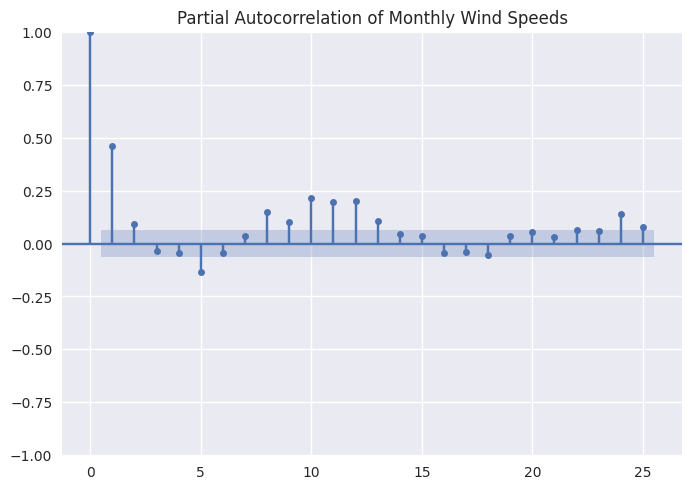

In [44]:
tsaplots.plot_pacf(monthly_weather['Wind Speed (knots)'], lags= 25)

plt.title('Partial Autocorrelation of Monthly Wind Speeds')
plt.savefig('plots/pacf_windspeed.png')

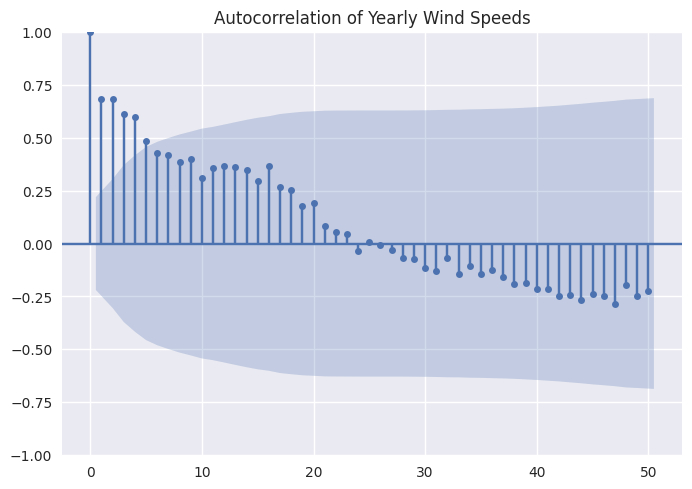

In [45]:
tsaplots.plot_acf(yearly_weather['Wind Speed (knots)'], lags= 50)
plt.title('Autocorrelation of Yearly Wind Speeds')
plt.savefig('plots/acf_wind_speed_yearly.png')

## Seasonal Decomposition

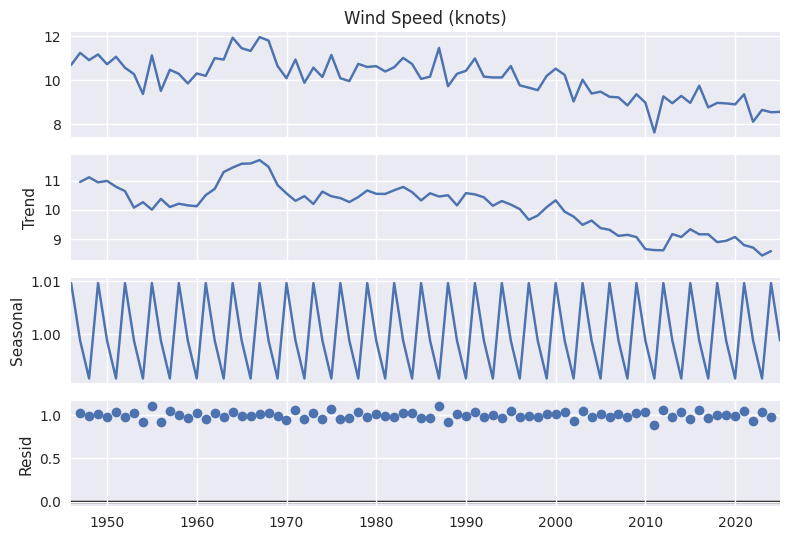

In [46]:
# Trends and Seasonality in Wind Speeds
decomposition = sm.tsa.seasonal_decompose(yearly_weather['Wind Speed (knots)'], model= 'mul', period = 3)
fig = decomposition.plot()

plt.savefig('plots/seasonal_windspeed.png')

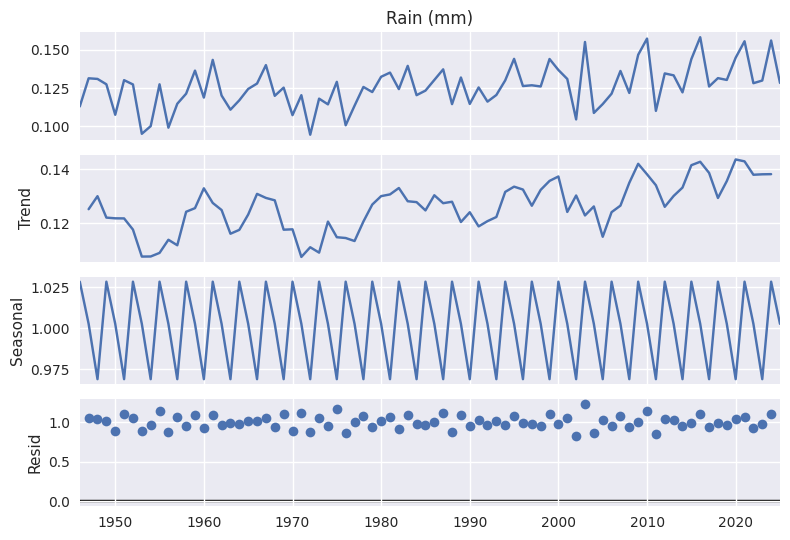

In [47]:
# Trends and Seasonality in Rainfall
decomposition = sm.tsa.seasonal_decompose(yearly_weather['Rain (mm)'], model= 'mul', period = 3)
fig = decomposition.plot()

plt.savefig('plots/seasonal_rain.png')

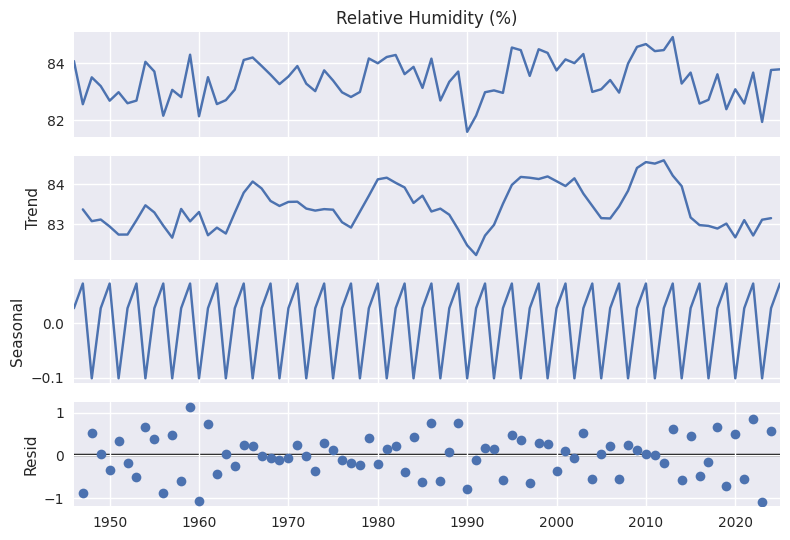

In [48]:
# Trends and Seasonality in Relative Humidity
decomposition = sm.tsa.seasonal_decompose(yearly_weather['Relative Humidity (%)'], model= 'add', period = 3)
fig = decomposition.plot()

plt.savefig('plots/seasonal_humidity.png')


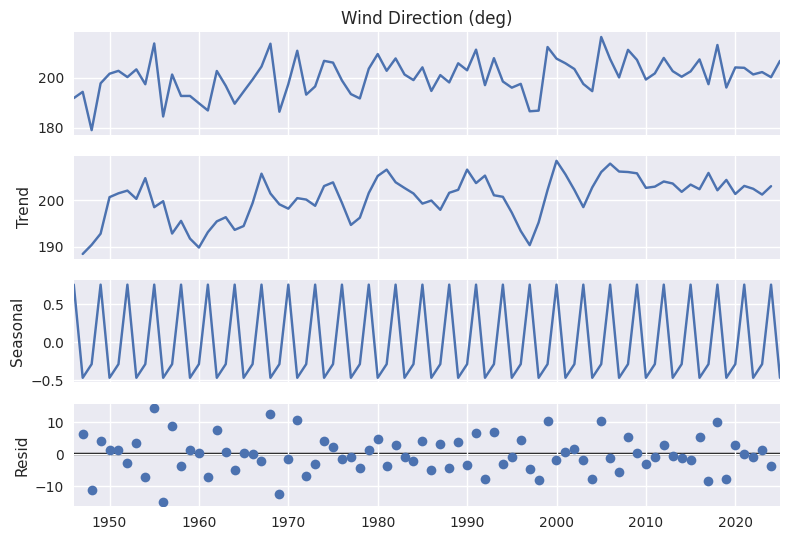

In [49]:
# Trends and Seasonality in Wind Direction
decomposition = sm.tsa.seasonal_decompose(yearly_weather['Wind Direction (deg)'], model= 'add', period = 3)
fig = decomposition.plot()

plt.savefig('plots/seasonal_direction.png')

The discussion of the trends in weather are found in [wind_energy_analysis.ipynb](wind_energy_analysis.ipynb)

***
End